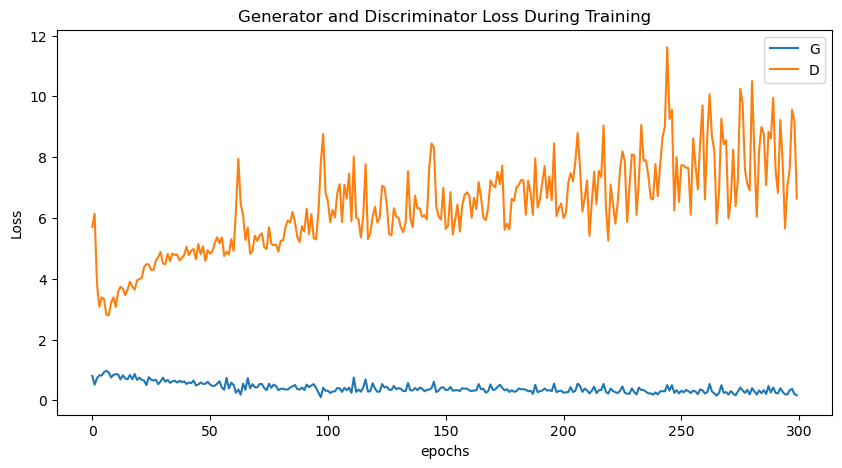

In [115]:
torch.save({
            'generator' : netG.state_dict(),
            'discriminator' : netD.state_dict(),
            'optimizerG' : optimizerG.state_dict(),
            'optimizerD' : optimizerD.state_dict(),
            'params' : params
            }, 'model_butterfly_final.pth')

# Plot the training losses.
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

![alt text](image-4.png)

In [135]:
params = {
    'dim_z' : 100,
    'num_epochs' : 300,
    'lr' : 0.0002,
    'save_epoch' : 10,
    'k_d':1,
    'k_g':1}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG = Generator(params).to(device)
netD = Discriminator().to(device)

# Load the model checkpoint
checkpoint = torch.load('model_butterfly_epoch_300.pth', map_location=device)

netG.load_state_dict(checkpoint['generator'])
netD.load_state_dict(checkpoint['discriminator'])

netG = netG.to(device)
netD = netD.to(device)

netG.eval()
fid_value = calculate_fid_butterfly(netG,params)
print(f"FID Score : {fid_value}")

100%|██████████| 17/17 [00:02<00:00,  5.88it/s]


FID Score : 269.94909226920674


FID Score: 269.94909226920674

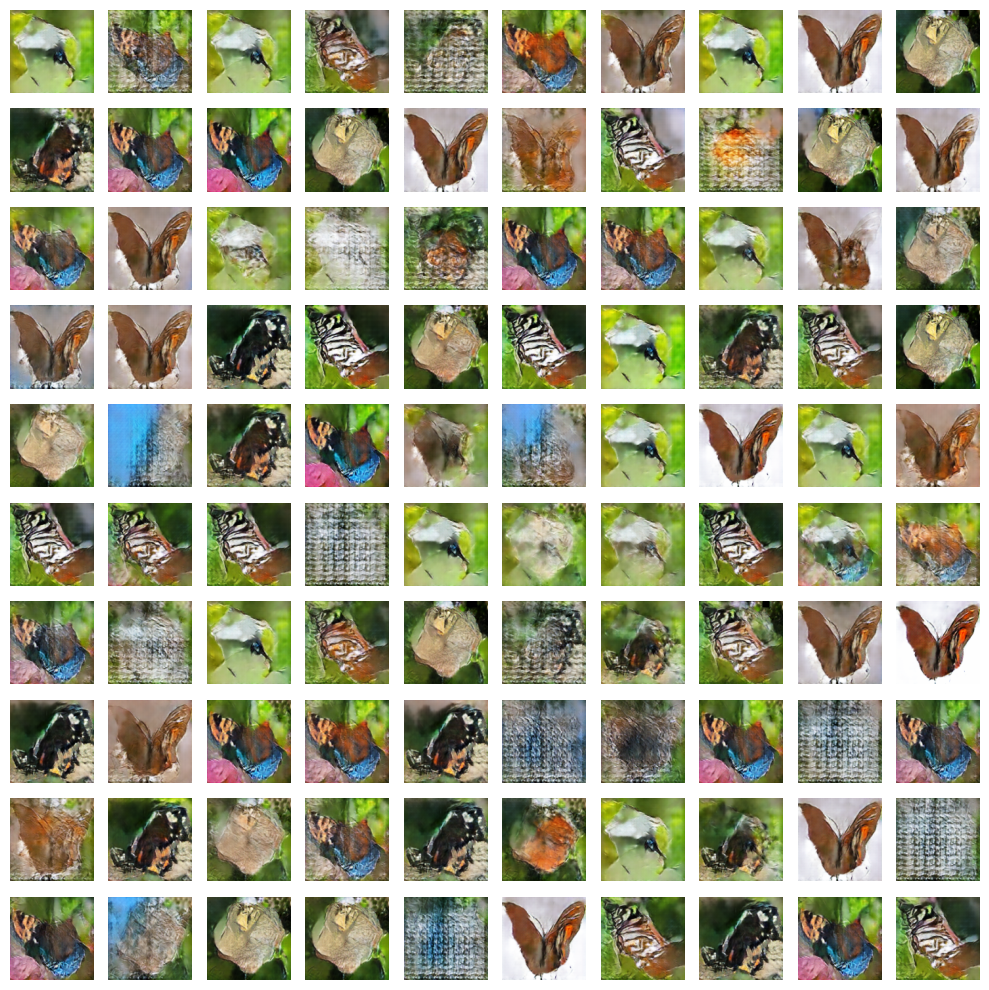

In [119]:
z = torch.randn(100, params['dim_z'], 1, 1, device=device)
with torch.no_grad():
    generated_img = netG(z).detach().cpu()

fig, axs = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        img = generated_img[i * 10 + j].permute(1, 2, 0).detach().numpy()
        min_val = img.min()
        max_val = img.max()
        normalized_img = (img - min_val) / (max_val - min_val)
                
        # Plot the image
        axs[i, j].imshow(normalized_img)
        axs[i, j].axis('off')


plt.tight_layout()
plt.show()

Result for training with 1300 epochs

[100/5000]	Loss_D: 0.5418	Loss_G: 8.2302	
100%|██████████| 17/17 [00:02<00:00,  5.90it/s]
100%|██████████| 17/17 [00:02<00:00,  5.79it/s]
FID Score at epoch 100: 265.5756449123425
[200/5000]	Loss_D: 1.8278	Loss_G: 12.9680	
100%|██████████| 17/17 [00:03<00:00,  5.62it/s]
100%|██████████| 17/17 [00:03<00:00,  5.56it/s]
FID Score at epoch 200: 260.11287320452135
[300/5000]	Loss_D: 0.0690	Loss_G: 6.6947	
100%|██████████| 17/17 [00:03<00:00,  5.63it/s]
100%|██████████| 17/17 [00:03<00:00,  5.48it/s]
FID Score at epoch 300: 269.94909226920674
[400/5000]	Loss_D: 0.0660	Loss_G: 6.6094	
100%|██████████| 17/17 [00:02<00:00,  5.76it/s]
100%|██████████| 17/17 [00:03<00:00,  5.64it/s]
FID Score at epoch 400: 272.3505561115856
[500/5000]	Loss_D: 0.0982	Loss_G: 7.4794	
100%|██████████| 17/17 [00:02<00:00,  5.79it/s]
100%|██████████| 17/17 [00:02<00:00,  5.70it/s]
FID Score at epoch 500: 261.8970786400116
[600/5000]	Loss_D: 0.0941	Loss_G: 8.2728 
100%|██████████| 17/17 [00:02<00:00,  5.70it/s]
100%|██████████| 17/17 [00:03<00:00,  5.61it/s]
FID Score at epoch 600: 280.54904498593854
[700/5000]	Loss_D: 0.0624	Loss_G: 19.8918	
100%|██████████| 17/17 [00:02<00:00,  5.73it/s]
100%|██████████| 17/17 [00:02<00:00,  5.69it/s]
FID Score at epoch 700: 266.00042002785563
[800/5000]	Loss_D: 0.0460	Loss_G: 7.7035	
100%|██████████| 17/17 [00:02<00:00,  5.70it/s]
100%|██████████| 17/17 [00:02<00:00,  5.70it/s]
FID Score at epoch 800: 267.01959457371385
[900/5000]	Loss_D: 0.0583	Loss_G: 17.5858	
100%|██████████| 17/17 [00:03<00:00,  5.66it/s]
100%|██████████| 17/17 [00:02<00:00,  5.70it/s]
FID Score at epoch 900: 269.76123992504054
[1000/5000]	Loss_D: 0.0076	Loss_G: 13.1993	
1024 1024
100%|██████████| 17/17 [00:03<00:00,  5.65it/s]
100%|██████████| 17/17 [00:03<00:00,  5.57it/s]
FID Score at epoch 1000: 265.89212881532993
[1100/5000]	Loss_D: 0.0374	Loss_G: 11.1844	
100%|██████████| 17/17 [00:03<00:00,  5.58it/s]
100%|██████████| 17/17 [00:03<00:00,  5.51it/s]
FID Score at epoch 1100: 276.03797094207513
[1200/5000]	Loss_D: 0.0423	Loss_G: 15.8633	
100%|██████████| 17/17 [00:03<00:00,  5.58it/s]
100%|██████████| 17/17 [00:03<00:00,  5.52it/s]
FID Score at epoch 1200: 268.8109143456627
[1300/5000]	Loss_D: 0.0253	Loss_G: 19.0147	

#### Training Discriminator and Generator in 2:1 ratio

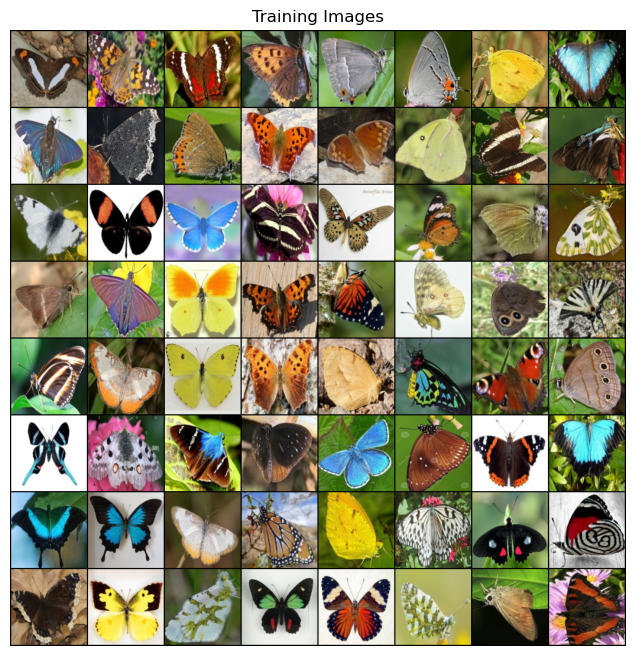

Generator(
  (conv_transpose1): ConvTranspose2d(100, 2048, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_transpose2): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_transpose3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_transpose4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_transpose5): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [64]:


# HyperParameters
params = {
    'dim_z' : 100,
    'num_epochs' : 500,
    'lr' : 0.0002,
    'save_epoch' : 10,
    'k_d':2,
    'k_g':1}

# Plot the training images.
data = next(iter(dataloader_butterfly))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(
    data['image'].to(device)[ : 64], padding=2, normalize=True).cpu(), (1, 2, 0)))

plt.show()

# Generator
netG = Generator(params).to(device)
netG.apply(weights_init)
print(netG)

# Discriminator
netD = Discriminator().to(device)
netD.apply(weights_init)
print(netD)

# Loss function.
criterion = nn.BCELoss()

# Optimizers
optimizerD = optim.Adam(netD.parameters(), lr=params['lr'], betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=params['lr'], betas=(0.5, 0.999))

G_losses = []
D_losses = []
